In [42]:
import pandas as pd
# Importing the dataset
dataset = pd.read_csv('churn_modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]
#Create dummy variables
dataset.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [43]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [44]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [45]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [47]:
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [14]:
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [48]:

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

In [32]:
X.shape

(10000, 14)

In [33]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,1,0


In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [50]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [82]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [83]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='Weights',
    project_name='Churn')

In [84]:
tuner.search_space_summary()

In [85]:
tuner.search(X_train, y_train,
             epochs=5,
             validation_data=(X_test, y_test))

Epoch 1/5
250/250 [==============================] - ETA: 0s - loss: 0.6933 - accuracy: 0.37 - ETA: 0s - loss: 0.5591 - accuracy: 0.78 - ETA: 0s - loss: 0.5078 - accuracy: 0.79 - ETA: 0s - loss: 0.4766 - accuracy: 0.79 - ETA: 0s - loss: 0.4604 - accuracy: 0.80 - 0s 2ms/step - loss: 0.4544 - accuracy: 0.8039 - val_loss: 0.3844 - val_accuracy: 0.8500
Epoch 2/5
250/250 [==============================] - ETA: 0s - loss: 0.4797 - accuracy: 0.78 - ETA: 0s - loss: 0.3907 - accuracy: 0.83 - ETA: 0s - loss: 0.3825 - accuracy: 0.84 - ETA: 0s - loss: 0.3733 - accuracy: 0.84 - ETA: 0s - loss: 0.3763 - accuracy: 0.84 - 0s 1ms/step - loss: 0.3746 - accuracy: 0.8454 - val_loss: 0.3703 - val_accuracy: 0.8400
Epoch 3/5
250/250 [==============================] - ETA: 0s - loss: 0.4217 - accuracy: 0.81 - ETA: 0s - loss: 0.3702 - accuracy: 0.84 - ETA: 0s - loss: 0.3532 - accuracy: 0.85 - ETA: 0s - loss: 0.3539 - accuracy: 0.85 - ETA: 0s - loss: 0.3578 - accuracy: 0.85 - 0s 1ms/step - loss: 0.3543 - accura

Epoch 1/5
250/250 [==============================] - ETA: 0s - loss: 0.6931 - accuracy: 0.68 - ETA: 1s - loss: 1.0228 - accuracy: 0.78 - ETA: 1s - loss: 0.7621 - accuracy: 0.79 - ETA: 1s - loss: 0.6684 - accuracy: 0.80 - ETA: 0s - loss: 0.6438 - accuracy: 0.79 - ETA: 0s - loss: 0.6142 - accuracy: 0.79 - ETA: 0s - loss: 0.5943 - accuracy: 0.79 - ETA: 0s - loss: 0.5862 - accuracy: 0.79 - ETA: 0s - loss: 0.5784 - accuracy: 0.79 - ETA: 0s - loss: 0.5733 - accuracy: 0.78 - ETA: 0s - loss: 0.5641 - accuracy: 0.79 - ETA: 0s - loss: 0.5577 - accuracy: 0.79 - ETA: 0s - loss: 0.5509 - accuracy: 0.79 - ETA: 0s - loss: 0.5436 - accuracy: 0.79 - ETA: 0s - loss: 0.5409 - accuracy: 0.79 - ETA: 0s - loss: 0.5391 - accuracy: 0.79 - ETA: 0s - loss: 0.5357 - accuracy: 0.79 - ETA: 0s - loss: 0.5341 - accuracy: 0.79 - ETA: 0s - loss: 0.5313 - accuracy: 0.79 - ETA: 0s - loss: 0.5336 - accuracy: 0.79 - ETA: 0s - loss: 0.5383 - accuracy: 0.79 - ETA: 0s - loss: 0.5379 - accuracy: 0.79 - 1s 6ms/step - loss: 0.5

250/250 [==============================] - ETA: 0s - loss: 0.4870 - accuracy: 0.81 - ETA: 1s - loss: 0.5183 - accuracy: 0.78 - ETA: 1s - loss: 0.4987 - accuracy: 0.80 - ETA: 1s - loss: 0.5082 - accuracy: 0.79 - ETA: 1s - loss: 0.5121 - accuracy: 0.79 - ETA: 1s - loss: 0.5170 - accuracy: 0.78 - ETA: 1s - loss: 0.5177 - accuracy: 0.78 - ETA: 1s - loss: 0.5171 - accuracy: 0.78 - ETA: 1s - loss: 0.5102 - accuracy: 0.79 - ETA: 1s - loss: 0.5076 - accuracy: 0.79 - ETA: 1s - loss: 0.5097 - accuracy: 0.79 - ETA: 0s - loss: 0.5137 - accuracy: 0.79 - ETA: 0s - loss: 0.5114 - accuracy: 0.79 - ETA: 0s - loss: 0.5134 - accuracy: 0.79 - ETA: 0s - loss: 0.5099 - accuracy: 0.79 - ETA: 0s - loss: 0.5051 - accuracy: 0.79 - ETA: 0s - loss: 0.5057 - accuracy: 0.79 - ETA: 0s - loss: 0.5082 - accuracy: 0.79 - ETA: 0s - loss: 0.5103 - accuracy: 0.79 - ETA: 0s - loss: 0.5117 - accuracy: 0.79 - ETA: 0s - loss: 0.5101 - accuracy: 0.79 - ETA: 0s - loss: 0.5081 - accuracy: 0.79 - ETA: 0s - loss: 0.5087 - accuracy

250/250 [==============================] - ETA: 0s - loss: 0.5254 - accuracy: 0.78 - ETA: 1s - loss: 0.4511 - accuracy: 0.83 - ETA: 1s - loss: 0.4502 - accuracy: 0.83 - ETA: 1s - loss: 0.4928 - accuracy: 0.80 - ETA: 1s - loss: 0.4994 - accuracy: 0.80 - ETA: 1s - loss: 0.4973 - accuracy: 0.80 - ETA: 0s - loss: 0.5008 - accuracy: 0.80 - ETA: 0s - loss: 0.4968 - accuracy: 0.80 - ETA: 0s - loss: 0.4962 - accuracy: 0.80 - ETA: 0s - loss: 0.4971 - accuracy: 0.80 - ETA: 0s - loss: 0.4987 - accuracy: 0.80 - ETA: 0s - loss: 0.4988 - accuracy: 0.80 - ETA: 0s - loss: 0.4997 - accuracy: 0.80 - ETA: 0s - loss: 0.5015 - accuracy: 0.80 - ETA: 0s - loss: 0.5039 - accuracy: 0.79 - ETA: 0s - loss: 0.5058 - accuracy: 0.79 - ETA: 0s - loss: 0.5044 - accuracy: 0.79 - ETA: 0s - loss: 0.5060 - accuracy: 0.79 - ETA: 0s - loss: 0.5089 - accuracy: 0.79 - ETA: 0s - loss: 0.5098 - accuracy: 0.79 - ETA: 0s - loss: 0.5086 - accuracy: 0.79 - ETA: 0s - loss: 0.5105 - accuracy: 0.79 - ETA: 0s - loss: 0.5073 - accuracy

Epoch 1/5
250/250 [==============================] - ETA: 0s - loss: 0.6872 - accuracy: 0.56 - ETA: 0s - loss: 0.5948 - accuracy: 0.77 - ETA: 0s - loss: 0.5359 - accuracy: 0.78 - ETA: 0s - loss: 0.5137 - accuracy: 0.78 - ETA: 0s - loss: 0.4928 - accuracy: 0.79 - 0s 2ms/step - loss: 0.4762 - accuracy: 0.7989 - val_loss: 0.4114 - val_accuracy: 0.8210
Epoch 2/5
250/250 [==============================] - ETA: 0s - loss: 0.3368 - accuracy: 0.87 - ETA: 0s - loss: 0.4083 - accuracy: 0.82 - ETA: 0s - loss: 0.4048 - accuracy: 0.82 - ETA: 0s - loss: 0.4031 - accuracy: 0.82 - ETA: 0s - loss: 0.3995 - accuracy: 0.83 - 0s 1ms/step - loss: 0.3974 - accuracy: 0.8340 - val_loss: 0.3714 - val_accuracy: 0.8550
Epoch 3/5
250/250 [==============================] - ETA: 0s - loss: 0.4265 - accuracy: 0.81 - ETA: 0s - loss: 0.3635 - accuracy: 0.84 - ETA: 0s - loss: 0.3544 - accuracy: 0.85 - ETA: 0s - loss: 0.3652 - accuracy: 0.84 - ETA: 0s - loss: 0.3620 - accuracy: 0.85 - ETA: 0s - loss: 0.3618 - accuracy: 

Epoch 1/5
250/250 [==============================] - ETA: 0s - loss: 0.6968 - accuracy: 0.18 - ETA: 0s - loss: 0.6724 - accuracy: 0.74 - ETA: 0s - loss: 0.6230 - accuracy: 0.77 - ETA: 0s - loss: 0.5879 - accuracy: 0.78 - ETA: 0s - loss: 0.5619 - accuracy: 0.78 - ETA: 0s - loss: 0.5454 - accuracy: 0.78 - ETA: 0s - loss: 0.5337 - accuracy: 0.78 - ETA: 0s - loss: 0.5247 - accuracy: 0.78 - ETA: 0s - loss: 0.5163 - accuracy: 0.78 - ETA: 0s - loss: 0.5108 - accuracy: 0.78 - ETA: 0s - loss: 0.5026 - accuracy: 0.78 - ETA: 0s - loss: 0.4972 - accuracy: 0.78 - ETA: 0s - loss: 0.4914 - accuracy: 0.79 - ETA: 0s - loss: 0.4873 - accuracy: 0.79 - ETA: 0s - loss: 0.4803 - accuracy: 0.79 - ETA: 0s - loss: 0.4741 - accuracy: 0.80 - 1s 4ms/step - loss: 0.4708 - accuracy: 0.8011 - val_loss: 0.4015 - val_accuracy: 0.8365
Epoch 2/5
250/250 [==============================] - ETA: 0s - loss: 0.2821 - accuracy: 0.90 - ETA: 0s - loss: 0.4023 - accuracy: 0.83 - ETA: 0s - loss: 0.3857 - accuracy: 0.83 - ETA: 0s 

250/250 [==============================] - ETA: 0s - loss: 0.2498 - accuracy: 0.90 - ETA: 0s - loss: 0.3198 - accuracy: 0.86 - ETA: 0s - loss: 0.3198 - accuracy: 0.87 - ETA: 0s - loss: 0.3310 - accuracy: 0.86 - ETA: 0s - loss: 0.3252 - accuracy: 0.86 - ETA: 0s - loss: 0.3285 - accuracy: 0.86 - ETA: 0s - loss: 0.3299 - accuracy: 0.86 - ETA: 0s - loss: 0.3356 - accuracy: 0.86 - ETA: 0s - loss: 0.3330 - accuracy: 0.86 - ETA: 0s - loss: 0.3318 - accuracy: 0.86 - ETA: 0s - loss: 0.3329 - accuracy: 0.86 - ETA: 0s - loss: 0.3280 - accuracy: 0.86 - ETA: 0s - loss: 0.3276 - accuracy: 0.86 - ETA: 0s - loss: 0.3258 - accuracy: 0.86 - ETA: 0s - loss: 0.3236 - accuracy: 0.86 - ETA: 0s - loss: 0.3252 - accuracy: 0.86 - ETA: 0s - loss: 0.3235 - accuracy: 0.86 - ETA: 0s - loss: 0.3227 - accuracy: 0.86 - ETA: 0s - loss: 0.3217 - accuracy: 0.86 - 1s 4ms/step - loss: 0.3211 - accuracy: 0.8696 - val_loss: 0.3511 - val_accuracy: 0.8605
Epoch 1/5
250/250 [==============================] - ETA: 0s - loss: 0.

Epoch 1/5
250/250 [==============================] - ETA: 0s - loss: 0.6815 - accuracy: 0.93 - ETA: 0s - loss: 1.1579 - accuracy: 0.81 - ETA: 0s - loss: 0.8133 - accuracy: 0.81 - ETA: 0s - loss: 0.6957 - accuracy: 0.80 - ETA: 0s - loss: 0.6456 - accuracy: 0.80 - ETA: 0s - loss: 0.6136 - accuracy: 0.80 - ETA: 0s - loss: 0.5955 - accuracy: 0.80 - ETA: 0s - loss: 0.5745 - accuracy: 0.80 - ETA: 0s - loss: 0.5580 - accuracy: 0.80 - ETA: 0s - loss: 0.5410 - accuracy: 0.80 - ETA: 0s - loss: 0.5307 - accuracy: 0.80 - ETA: 0s - loss: 0.5204 - accuracy: 0.81 - ETA: 0s - loss: 0.5078 - accuracy: 0.81 - ETA: 0s - loss: 0.5060 - accuracy: 0.81 - ETA: 0s - loss: 0.5013 - accuracy: 0.81 - ETA: 0s - loss: 0.4959 - accuracy: 0.81 - ETA: 0s - loss: 0.4935 - accuracy: 0.81 - ETA: 0s - loss: 0.4884 - accuracy: 0.81 - ETA: 0s - loss: 0.4860 - accuracy: 0.81 - 1s 5ms/step - loss: 0.4860 - accuracy: 0.8156 - val_loss: 0.4007 - val_accuracy: 0.8310
Epoch 2/5
250/250 [==============================] - ETA: 0s 

250/250 [==============================] - ETA: 0s - loss: 0.4503 - accuracy: 0.75 - ETA: 1s - loss: 0.3616 - accuracy: 0.83 - ETA: 1s - loss: 0.4660 - accuracy: 0.84 - ETA: 0s - loss: 0.4322 - accuracy: 0.85 - ETA: 0s - loss: 0.4346 - accuracy: 0.84 - ETA: 0s - loss: 0.4306 - accuracy: 0.83 - ETA: 0s - loss: 0.4210 - accuracy: 0.84 - ETA: 0s - loss: 0.4323 - accuracy: 0.83 - ETA: 0s - loss: 0.4252 - accuracy: 0.83 - ETA: 0s - loss: 0.4209 - accuracy: 0.83 - ETA: 0s - loss: 0.4125 - accuracy: 0.83 - ETA: 0s - loss: 0.4113 - accuracy: 0.83 - ETA: 0s - loss: 0.4147 - accuracy: 0.83 - ETA: 0s - loss: 0.4119 - accuracy: 0.83 - ETA: 0s - loss: 0.4098 - accuracy: 0.83 - ETA: 0s - loss: 0.4046 - accuracy: 0.84 - ETA: 0s - loss: 0.4025 - accuracy: 0.84 - ETA: 0s - loss: 0.4028 - accuracy: 0.84 - ETA: 0s - loss: 0.4007 - accuracy: 0.84 - ETA: 0s - loss: 0.4027 - accuracy: 0.83 - ETA: 0s - loss: 0.4023 - accuracy: 0.84 - ETA: 0s - loss: 0.3998 - accuracy: 0.84 - 1s 5ms/step - loss: 0.3995 - accu

INFO:tensorflow:Oracle triggered exit


In [86]:
tuner.get_best_hyperparameters

<bound method BaseTuner.get_best_hyperparameters of <kerastuner.tuners.randomsearch.RandomSearch object at 0x000001704EA9B220>>

In [87]:
 tuner.get_best_models(num_models=3)

In [65]:
tuner.results_summary()

In [88]:
# Importing the Keras libraries and packages
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

# Initialising the ANN
classifier = Sequential()

# Adding the layers as per the results obtained in  tuner.results_summary()
classifier.add(Dense(units = 288,kernel_initializer='he_uniform',activation='relu',input_dim = 11))

classifier.add(Dense(units = 96, kernel_initializer = 'he_uniform',activation='relu'))
classifier.add(Dense(units = 416, kernel_initializer = 'he_uniform',activation='relu'))
classifier.add(Dense(units = 224, kernel_initializer = 'he_uniform',activation='relu'))
classifier.add(Dense(units = 416, kernel_initializer = 'he_uniform',activation='relu'))
classifier.add(Dense(units = 32, kernel_initializer = 'he_uniform',activation='relu'))
classifier.add(Dense(units = 64, kernel_initializer = 'he_uniform',activation='relu'))
classifier.add(Dense(units = 64, kernel_initializer = 'he_uniform',activation='relu'))
classifier.add(Dense(units = 160, kernel_initializer = 'he_uniform',activation='relu'))
classifier.add(Dense(units = 320, kernel_initializer = 'he_uniform',activation='relu'))
classifier.add(Dense(units = 320, kernel_initializer = 'he_uniform',activation='relu'))
classifier.add(Dense(units = 32, kernel_initializer = 'he_uniform',activation='relu'))
classifier.add(Dense(units = 64, kernel_initializer = 'he_uniform',activation='relu'))
classifier.add(Dense(units = 352, kernel_initializer = 'he_uniform',activation='relu'))
classifier.add(Dense(units = 384, kernel_initializer = 'he_uniform',activation='relu'))



# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [75]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 288)               3456      
_________________________________________________________________
dense_17 (Dense)             (None, 96)                27744     
_________________________________________________________________
dense_18 (Dense)             (None, 320)               31040     
_________________________________________________________________
dense_19 (Dense)             (None, 32)                10272     
_________________________________________________________________
dense_20 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_21 (Dense)             (None, 352)               22880     
_________________________________________________________________
dense_22 (Dense)             (None, 384)              

In [89]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 100,epochs = 100)

Epoch 1/100
54/54 [==============================] - ETA: 0s - loss: 0.6459 - accuracy: 0.67 - ETA: 0s - loss: 0.5970 - accuracy: 0.78 - ETA: 0s - loss: 0.5432 - accuracy: 0.78 - ETA: 0s - loss: 0.4971 - accuracy: 0.79 - ETA: 0s - loss: 0.4846 - accuracy: 0.79 - ETA: 0s - loss: 0.4826 - accuracy: 0.79 - ETA: 0s - loss: 0.4767 - accuracy: 0.79 - 1s 11ms/step - loss: 0.4695 - accuracy: 0.7951 - val_loss: 0.5239 - val_accuracy: 0.7993
Epoch 2/100
54/54 [==============================] - ETA: 0s - loss: 0.3482 - accuracy: 0.86 - ETA: 0s - loss: 0.4610 - accuracy: 0.81 - ETA: 0s - loss: 0.4557 - accuracy: 0.81 - ETA: 0s - loss: 0.4353 - accuracy: 0.82 - ETA: 0s - loss: 0.4256 - accuracy: 0.82 - ETA: 0s - loss: 0.4233 - accuracy: 0.82 - 0s 7ms/step - loss: 0.4200 - accuracy: 0.8212 - val_loss: 0.3908 - val_accuracy: 0.8364
Epoch 3/100
54/54 [==============================] - ETA: 0s - loss: 0.3858 - accuracy: 0.85 - ETA: 0s - loss: 0.3966 - accuracy: 0.84 - ETA: 0s - loss: 0.3920 - accuracy:

Epoch 21/100
54/54 [==============================] - ETA: 0s - loss: 0.1566 - accuracy: 0.94 - ETA: 0s - loss: 0.1661 - accuracy: 0.92 - ETA: 0s - loss: 0.1724 - accuracy: 0.92 - ETA: 0s - loss: 0.1752 - accuracy: 0.91 - ETA: 0s - loss: 0.1845 - accuracy: 0.91 - ETA: 0s - loss: 0.1871 - accuracy: 0.91 - 0s 6ms/step - loss: 0.1896 - accuracy: 0.9106 - val_loss: 0.5296 - val_accuracy: 0.8304
Epoch 22/100
54/54 [==============================] - ETA: 0s - loss: 0.1436 - accuracy: 0.94 - ETA: 0s - loss: 0.1587 - accuracy: 0.91 - ETA: 0s - loss: 0.1670 - accuracy: 0.91 - ETA: 0s - loss: 0.1613 - accuracy: 0.91 - ETA: 0s - loss: 0.1695 - accuracy: 0.91 - ETA: 0s - loss: 0.1730 - accuracy: 0.91 - 0s 6ms/step - loss: 0.1720 - accuracy: 0.9170 - val_loss: 0.7472 - val_accuracy: 0.8262
Epoch 23/100
54/54 [==============================] - ETA: 0s - loss: 0.1497 - accuracy: 0.92 - ETA: 0s - loss: 0.1474 - accuracy: 0.92 - ETA: 0s - loss: 0.1477 - accuracy: 0.92 - ETA: 0s - loss: 0.1602 - accurac

Epoch 41/100
54/54 [==============================] - ETA: 0s - loss: 0.1118 - accuracy: 0.98 - ETA: 0s - loss: 0.0874 - accuracy: 0.97 - ETA: 0s - loss: 0.0843 - accuracy: 0.97 - ETA: 0s - loss: 0.0783 - accuracy: 0.97 - ETA: 0s - loss: 0.0764 - accuracy: 0.97 - ETA: 0s - loss: 0.0764 - accuracy: 0.96 - 0s 6ms/step - loss: 0.0795 - accuracy: 0.9679 - val_loss: 1.0939 - val_accuracy: 0.8194
Epoch 42/100
54/54 [==============================] - ETA: 0s - loss: 0.1439 - accuracy: 0.96 - ETA: 0s - loss: 0.0879 - accuracy: 0.97 - ETA: 0s - loss: 0.0922 - accuracy: 0.96 - ETA: 0s - loss: 0.0837 - accuracy: 0.96 - ETA: 0s - loss: 0.0816 - accuracy: 0.96 - ETA: 0s - loss: 0.0772 - accuracy: 0.97 - 0s 6ms/step - loss: 0.0794 - accuracy: 0.9694 - val_loss: 1.5126 - val_accuracy: 0.8179
Epoch 43/100
54/54 [==============================] - ETA: 0s - loss: 0.0606 - accuracy: 0.99 - ETA: 0s - loss: 0.0724 - accuracy: 0.98 - ETA: 0s - loss: 0.0770 - accuracy: 0.97 - ETA: 0s - loss: 0.0828 - accurac

54/54 [==============================] - ETA: 0s - loss: 0.0294 - accuracy: 0.99 - ETA: 0s - loss: 0.0473 - accuracy: 0.97 - ETA: 0s - loss: 0.0582 - accuracy: 0.97 - ETA: 0s - loss: 0.0565 - accuracy: 0.98 - ETA: 0s - loss: 0.0554 - accuracy: 0.97 - ETA: 0s - loss: 0.0545 - accuracy: 0.97 - 0s 6ms/step - loss: 0.0544 - accuracy: 0.9797 - val_loss: 1.1847 - val_accuracy: 0.8080
Epoch 63/100
54/54 [==============================] - ETA: 0s - loss: 0.0313 - accuracy: 0.98 - ETA: 0s - loss: 0.0213 - accuracy: 0.99 - ETA: 0s - loss: 0.0343 - accuracy: 0.98 - ETA: 0s - loss: 0.0368 - accuracy: 0.98 - ETA: 0s - loss: 0.0322 - accuracy: 0.98 - ETA: 0s - loss: 0.0369 - accuracy: 0.98 - 0s 6ms/step - loss: 0.0384 - accuracy: 0.9877 - val_loss: 1.0450 - val_accuracy: 0.8065
Epoch 64/100
54/54 [==============================] - ETA: 0s - loss: 0.0415 - accuracy: 0.98 - ETA: 0s - loss: 0.0727 - accuracy: 0.97 - ETA: 0s - loss: 0.0670 - accuracy: 0.98 - ETA: 0s - loss: 0.0574 - accuracy: 0.98 - ETA

54/54 [==============================] - ETA: 0s - loss: 0.0108 - accuracy: 0.99 - ETA: 0s - loss: 0.0148 - accuracy: 0.99 - ETA: 0s - loss: 0.0119 - accuracy: 0.99 - ETA: 0s - loss: 0.0095 - accuracy: 0.99 - ETA: 0s - loss: 0.0099 - accuracy: 0.99 - ETA: 0s - loss: 0.0125 - accuracy: 0.99 - 0s 7ms/step - loss: 0.0153 - accuracy: 0.9953 - val_loss: 1.7745 - val_accuracy: 0.8058
Epoch 84/100
54/54 [==============================] - ETA: 0s - loss: 0.0021 - accuracy: 1.00 - ETA: 0s - loss: 0.0383 - accuracy: 0.99 - ETA: 0s - loss: 0.0332 - accuracy: 0.99 - ETA: 0s - loss: 0.0318 - accuracy: 0.99 - ETA: 0s - loss: 0.0280 - accuracy: 0.99 - ETA: 0s - loss: 0.0285 - accuracy: 0.99 - 0s 6ms/step - loss: 0.0288 - accuracy: 0.9912 - val_loss: 1.4867 - val_accuracy: 0.8099
Epoch 85/100
54/54 [==============================] - ETA: 0s - loss: 0.0072 - accuracy: 1.00 - ETA: 0s - loss: 0.0284 - accuracy: 0.99 - ETA: 0s - loss: 0.0305 - accuracy: 0.99 - ETA: 0s - loss: 0.0260 - accuracy: 0.99 - ETA

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


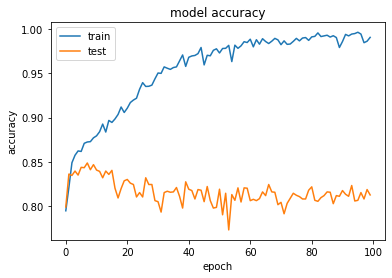

In [90]:
import matplotlib.pyplot as plt

# list all data in history

print(model_history.history.keys())

# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()